## MNIST Digit Classifier (2 -> 128 -> 64 -> 10)

Neural network in PyTorch to classify handwritten digits (0-9) from the MNIST dataset.

- load and explore MNIST dataset
- build a simple feedforward neural netowrk using nn.Module
- train and evaluate the model
- visualize predictions

Dataset: 28x28 grayscale images of digits (0-9)

Architecture:
- input layer: 784 units (flattened 28x28)
- hidden layers: 128 -> 64
- output layer: 10 units (one per digit)


## Import Libraries

In [1]:
import torch
import torch.nn as nn
# a module that provides functions for operations used in neural networks
# e.g. F.relu, F.cross_entropy, F.softmax
import torch.nn.functional as F
import torch.optim as optim

# a library that provides standard datasets like MNIST,
# common image transformations, and pretrained models
import torchvision
from torchvision import datasets, transforms

# a module that helps with data loading and batching
from torch.utils.data import DataLoader     

import matplotlib.pyplot as plt
import numpy as np

## Load the MNIST Dataset

In [2]:
# convert each image from a PIL image to a tensor
transform = transforms.ToTensor()

# 60000 training samples and 10000 test samples
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## Visualize Some Sample Images

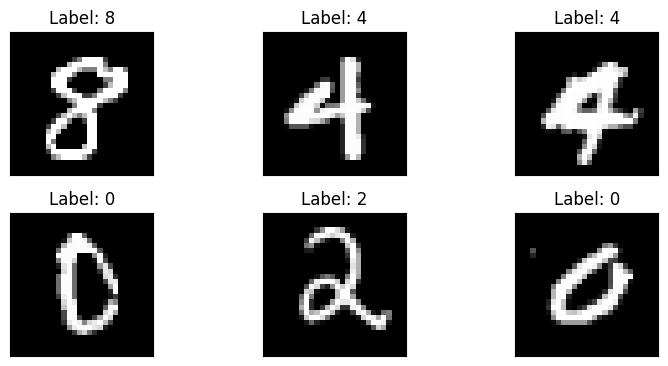

In [3]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i].item()}")
    plt.xticks([])
    plt.yticks([])